In [4]:
%pip install pgmpy
%pip install pymc
%pip install arviz

In [33]:
import pymc as pm
import pandas as pd
import arviz as az
import numpy as np

df = pd.read_csv('sample_data/date_regresie.csv');
y=np.array(list(df['Satisfactie']));
x1 = np.array(list(df['Salariu']));
x2 = np.array(list(df['Ore_lucrate']));
print(x1);
print(x2);

[5.62 9.66 8.12 7.19 4.09 4.09 3.41 9.06 7.21 7.96 3.14 9.79 8.83 4.49
 4.27 4.28 5.13 6.67 6.02 5.04 7.28 3.98 5.05 5.56 6.19 8.5  4.4  6.6
 7.15 3.33 7.25 4.19 3.46 9.64 9.76 8.66 5.13 3.68 7.79 6.08 3.85 6.47
 3.24 9.37 4.81 7.64 5.18 6.64 6.83 4.29 9.79 8.43 9.58 9.26 7.19 9.45
 3.62 4.37 3.32 5.28 5.72 4.9  8.8  5.5  4.97 6.8  3.99 8.62 3.52 9.91
 8.41 4.39 3.04 8.71 7.95 8.1  8.4  3.52 5.51 3.81 9.04 7.36 5.32 3.44
 5.18 5.28 8.11 7.46 9.21 6.31 3.84 7.99 8.33 6.93 8.4  6.46 6.66 5.99
 3.18 3.76]
[30.94 49.09 39.43 45.26 57.23 37.48 42.31 52.67 36.86 32.31 38.69 34.84
 57.89 54.24 49.   56.14 54.11 35.6  56.78 46.18 54.22 56.88 39.54 33.3
 36.84 42.81 54.54 55.82 30.21 45.32 42.52 36.66 33.6  40.13 58.29 39.7
 45.56 51.09 40.91 59.15 58.87 37.55 44.92 39.03 38.55 31.11 48.29 45.08
 31.54 38.36 57.25 37.19 34.35 44.68 59.57 37.26 50.16 52.85 37.13 51.85
 41.03 48.97 49.01 46.07 32.71 55.06 39.62 35.6  31.22 47.73 50.33 30.5
 45.36 36.79 49.36 35.23 50.73 41.6  58.1  34.13 40.23 33

Output()

/usr/local/lib/python3.11/dist-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (105) in plot_posterior, generating only 40 plots
  warnings.warn(


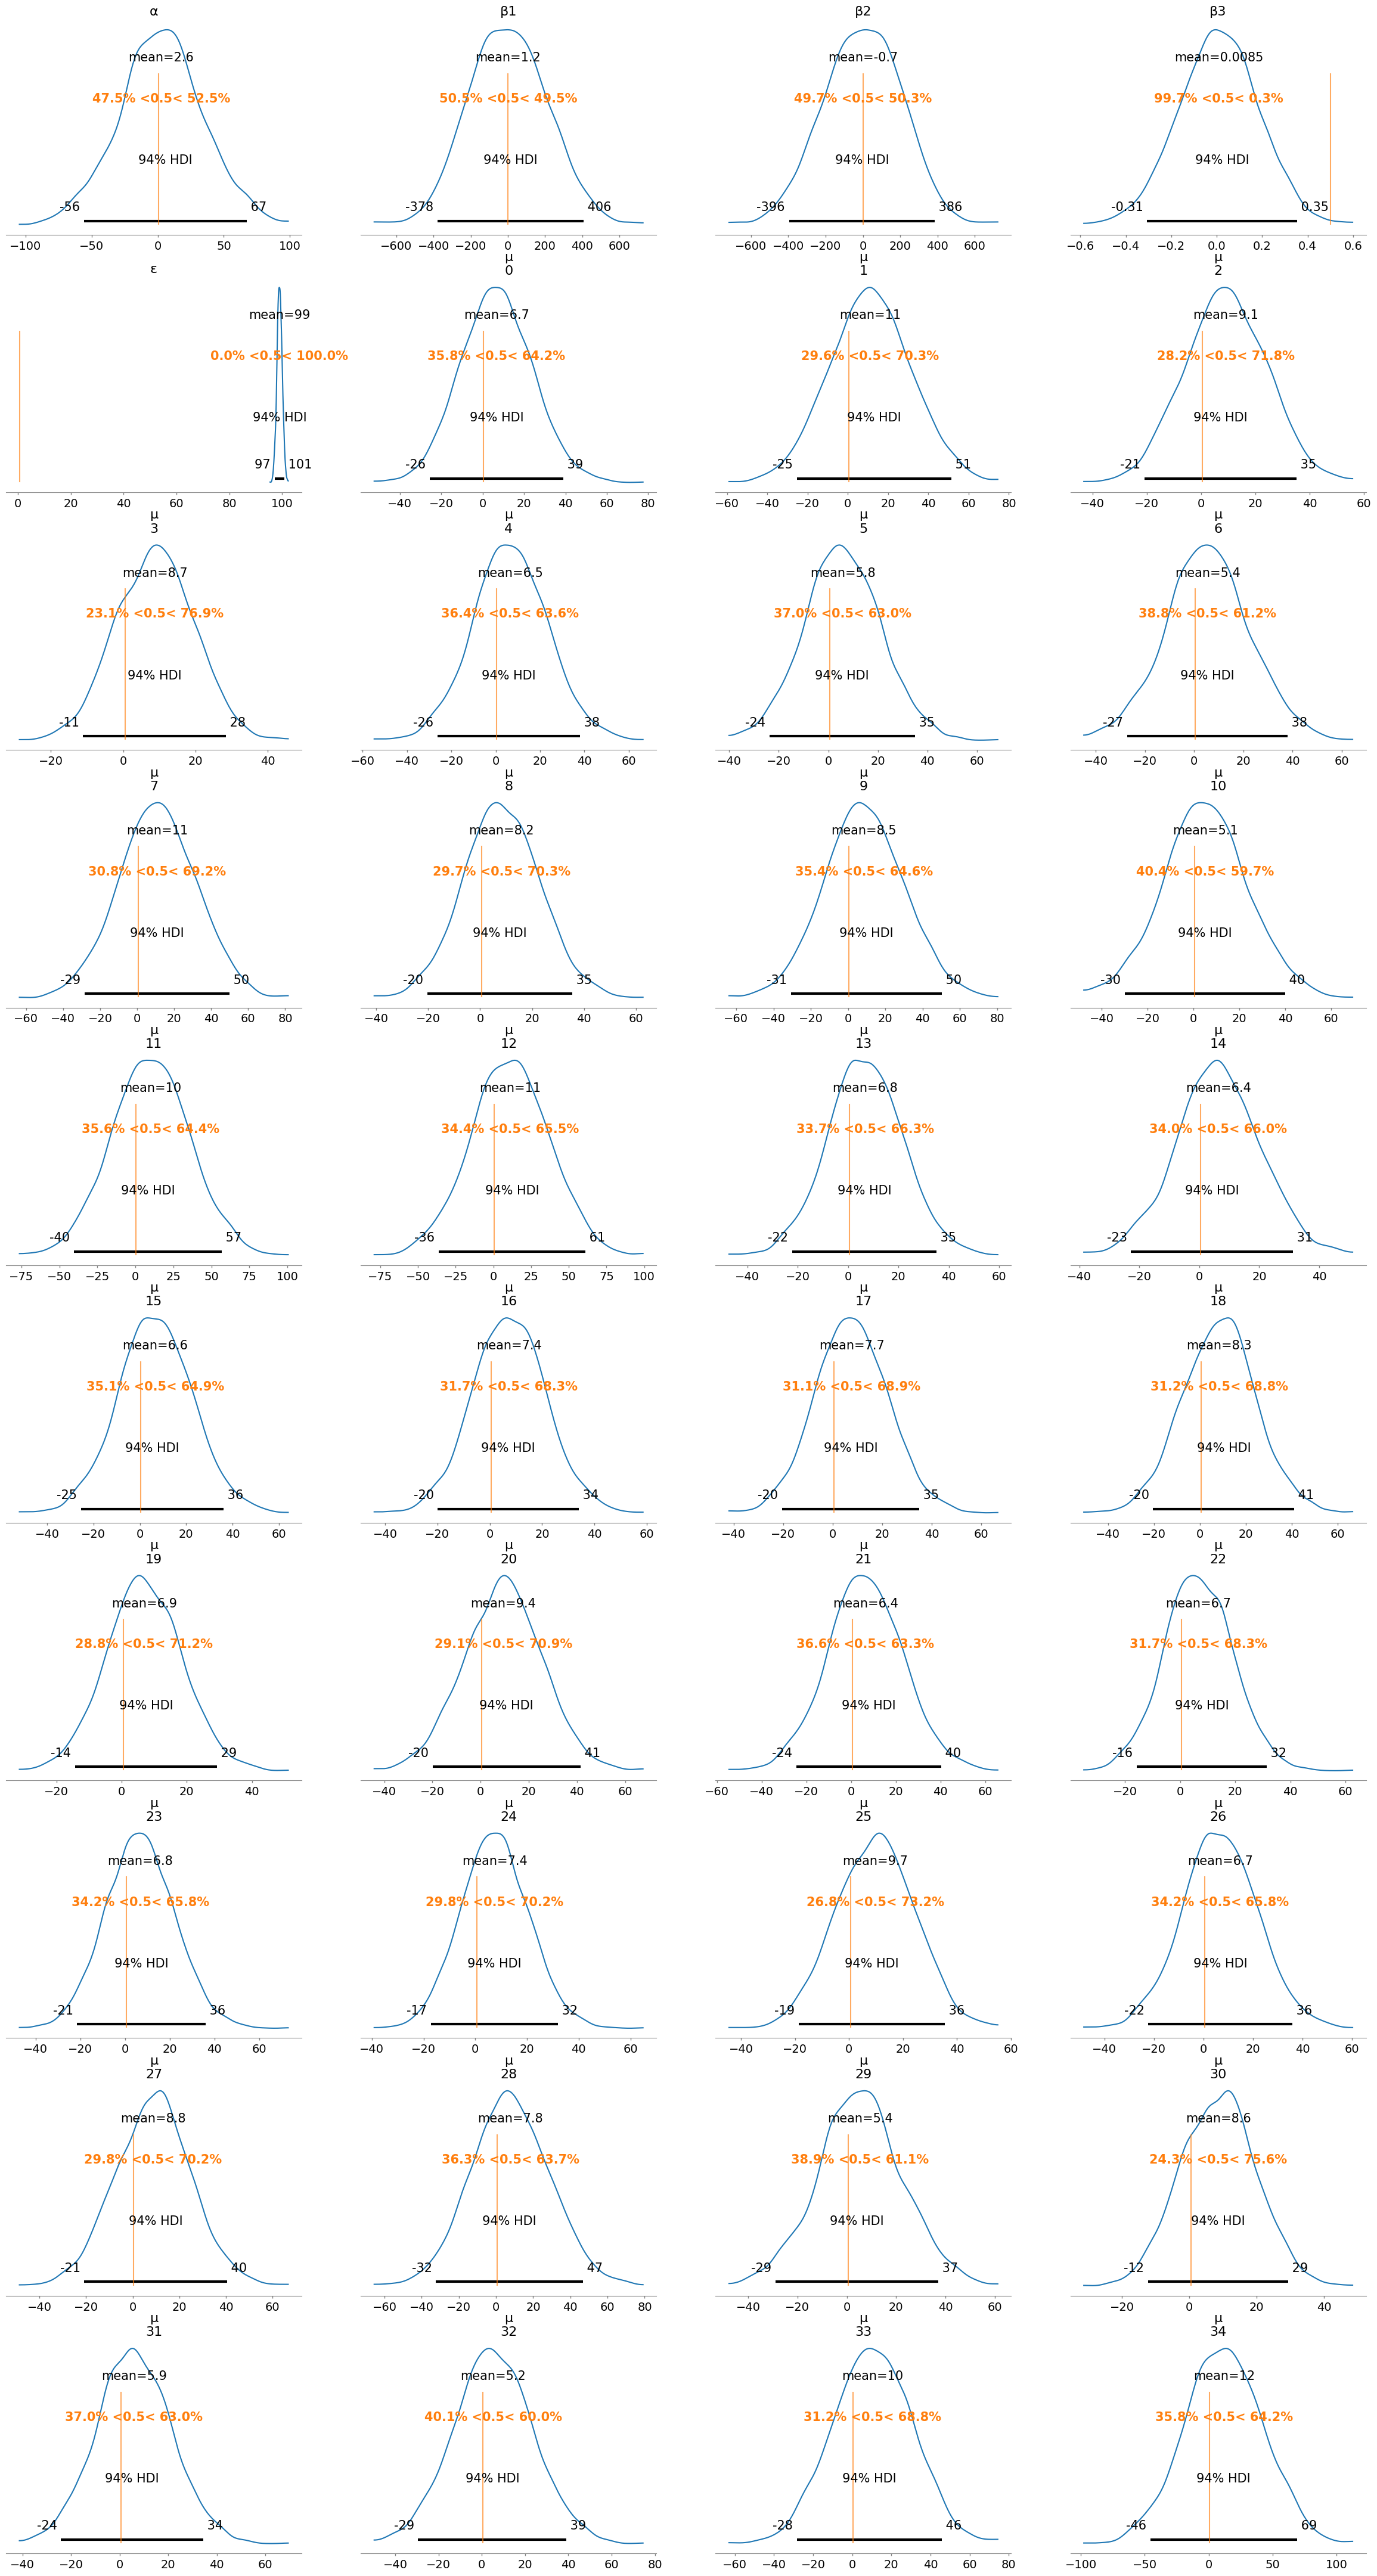

In [36]:

with pm.Model() as model:

  sigma_data=10
  sg =300;
  alpha = pm.Normal('α', mu=0, sigma=sg)
  beta1 = pm.Normal('β1', mu=5, sigma=sg)
  beta2 = pm.Normal('β2', mu=0, sigma=sg)
  beta3 = pm.Normal('β3', mu=0, sigma=sg)

  eps = pm.Normal('ε', sigma_data**2);

  mu = pm.Deterministic('μ', alpha + beta1 * x1 + beta2 * x1 + (beta3 * x1) * x2)

  y_pred = pm.Normal('y_pred', mu=mu, sigma=eps, observed=y );

  idata = pm.sample(2000, tune=2000, return_inferencedata=True)

az.plot_posterior(idata, ref_val=0.5);

In [37]:
  posterior = idata.posterior.stack(samples={"chain", "draw"})
  #idata_x1x2x3.summary();
  alpha_m = posterior['α'].mean().item()
  beta1_m = posterior['β1'].mean().item()
  beta2_m = posterior['β2'].mean().item()
  beta3_m = posterior['β3'].mean().item()
  print('alpha_m: ', alpha_m);
  print('beta1_m: ',  beta1_m);
  print('beta2_m: ', beta2_m);
  print( 'beta3_m' , beta3_m);
  '''
  alpha_m:  2.5795393684195456
  beta1_m:  1.1759757009339293
  beta2_m:  -0.7034346832450764
  beta3_m 0.008489766605219622
  '''

alpha_m:  2.5795393684195456
beta1_m:  1.1759757009339293
beta2_m:  -0.7034346832450764
beta3_m 0.008489766605219622


In [44]:
df2 = pd.read_csv('sample_data/greutati.csv');
y2 = list(df2['Greutate_pește'])

In [ ]:

listK = [3,4,5];
for i in range(3):
  clusters = listK[i];
  with pm.Model() as model_kg:
    p = pm.Dirichlet('p', a=np.ones(clusters))
    z = pm.Categorical('z', p=p, shape=len(y2))
    means = pm.Normal('means', mu=np.mean(y2), sigma=10, shape=clusters)
    sd = pm.HalfNormal('sd', sigma=10)
    y = pm.Normal('y', mu=means[z], sigma=sd, observed=y2)
    idata_kg = pm.sample(return_inferencedata=True)

    pm.compute_log_likelihood(idata_kg ,model=model_kg)
    waic_p = az.waic(idata_kg, scale="deviance")
    print('Pentru k = ', clusters);
    print(waic_p)
    loo_p = az.loo(idata_kg, scale="deviance")
    print(loo_p)

#erorile sunt: elpd/prima la loo
#trebuie ales numarul k cu elpd/deviance_loo cel mai mic.

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Pentru k =  3
Computed from 2000 posterior samples and 200 observations log-likelihood matrix.

              Estimate       SE
deviance_waic  1409.32    17.48
p_waic           44.41        -

There has been a warning during the calculation. Please check the results.


/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:1043: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 2000 posterior samples and 200 observations log-likelihood matrix.

             Estimate       SE
deviance_loo  1452.36    20.19
p_loo           65.93        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)       58   29.0%
   (0.70, 1]   (bad)        63   31.5%
   (1, Inf)   (very bad)   79   39.5%



Output()

ERROR:pymc.stats.convergence:There were 130 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Pentru k =  4
Computed from 2000 posterior samples and 200 observations log-likelihood matrix.

              Estimate       SE
deviance_waic  1400.62    17.93
p_waic           51.33        -

There has been a warning during the calculation. Please check the results.


/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:1043: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 2000 posterior samples and 200 observations log-likelihood matrix.

             Estimate       SE
deviance_loo  1435.54    19.76
p_loo           68.79        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)      108   54.0%
   (0.70, 1]   (bad)        52   26.0%
   (1, Inf)   (very bad)   40   20.0%



Output()

In [ ]:
bestK = 4;#K cu elpd si deviance_loo cele mai mici.
clusters = listK[i];
with pm.Model() as model_kg:
  p = pm.Dirichlet('p', a=np.ones(clusters))
  z = pm.Categorical('z', p=p, shape=len(y2))
  means = pm.Normal('means', mu=y2.mean(), sigma=10, shape=clusters)
  sd = pm.HalfNormal('sd', sigma=10)
  y = pm.Normal('y', mu=means[z], sigma=sd, observed=y2)
  idata_kg = pm.sample(return_inferencedata=True)

  pm.compute_log_likelihood(idata_kg ,model=model_kg)
  waic_p = az.waic(idata_kg, scale="deviance")
  print('Pentru k = ', clusters);
  print(waic_p)
  loo_p = az.loo(idata_kg, scale="deviance")
  print(loo_p);

varnames = ['means', 'p']
az.summary(idata_kg, varnames);
